In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#vesicleName = "2018-06-05_v7"
#vesicleName = "2018-06-05_v10"
#vesicleName = "2018-06-07_v4"
#vesicleName = "2018-06-12_v3"
#vesicleName = "2018-06-12_v6"
vesicleName = "2018-08-09_v8"

force = pd.read_csv("/Users/johannesschoeneberg/Dropbox/ESCRT_data_sharing/fit_force_radius/"+vesicleName+"/forceFile.csv",names=['time','force'],skiprows=1, header=None)
radius = pd.read_csv("/Users/johannesschoeneberg/Dropbox/ESCRT_data_sharing/fit_force_radius/"+vesicleName+"/tube_radius.csv",names=['id','radius','time'],skiprows=1, header=None)


In [3]:
#The Helfrich predictions are:
#
#F/F0 = (R/R0 + R0/R)/2
#
#and
#
#R/R0 =F/F0 - sqrt[(F/F0)**2-1]


In [4]:

def calcForce_gerhard(R,F0,R0):
#    F = F0*(R/R0-np.sqrt((F/F0)**2-1))
    F = F0*(R/R0 + R0/R)/2
    return(F)

def calcRadius_gerhard(F,F0,R0):
#    F = F0*(R/R0-np.sqrt((F/F0)**2-1))
    R = R0*(F/F0 - np.sqrt((F/F0)**2-1))
    return(R)

/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


[-205.49995 -205.49496 -205.48996 ...,  304.47721  304.48221  304.48721]
[-205.49995 -205.49496 -205.48996 ...,  304.47721  304.48221  304.48721]


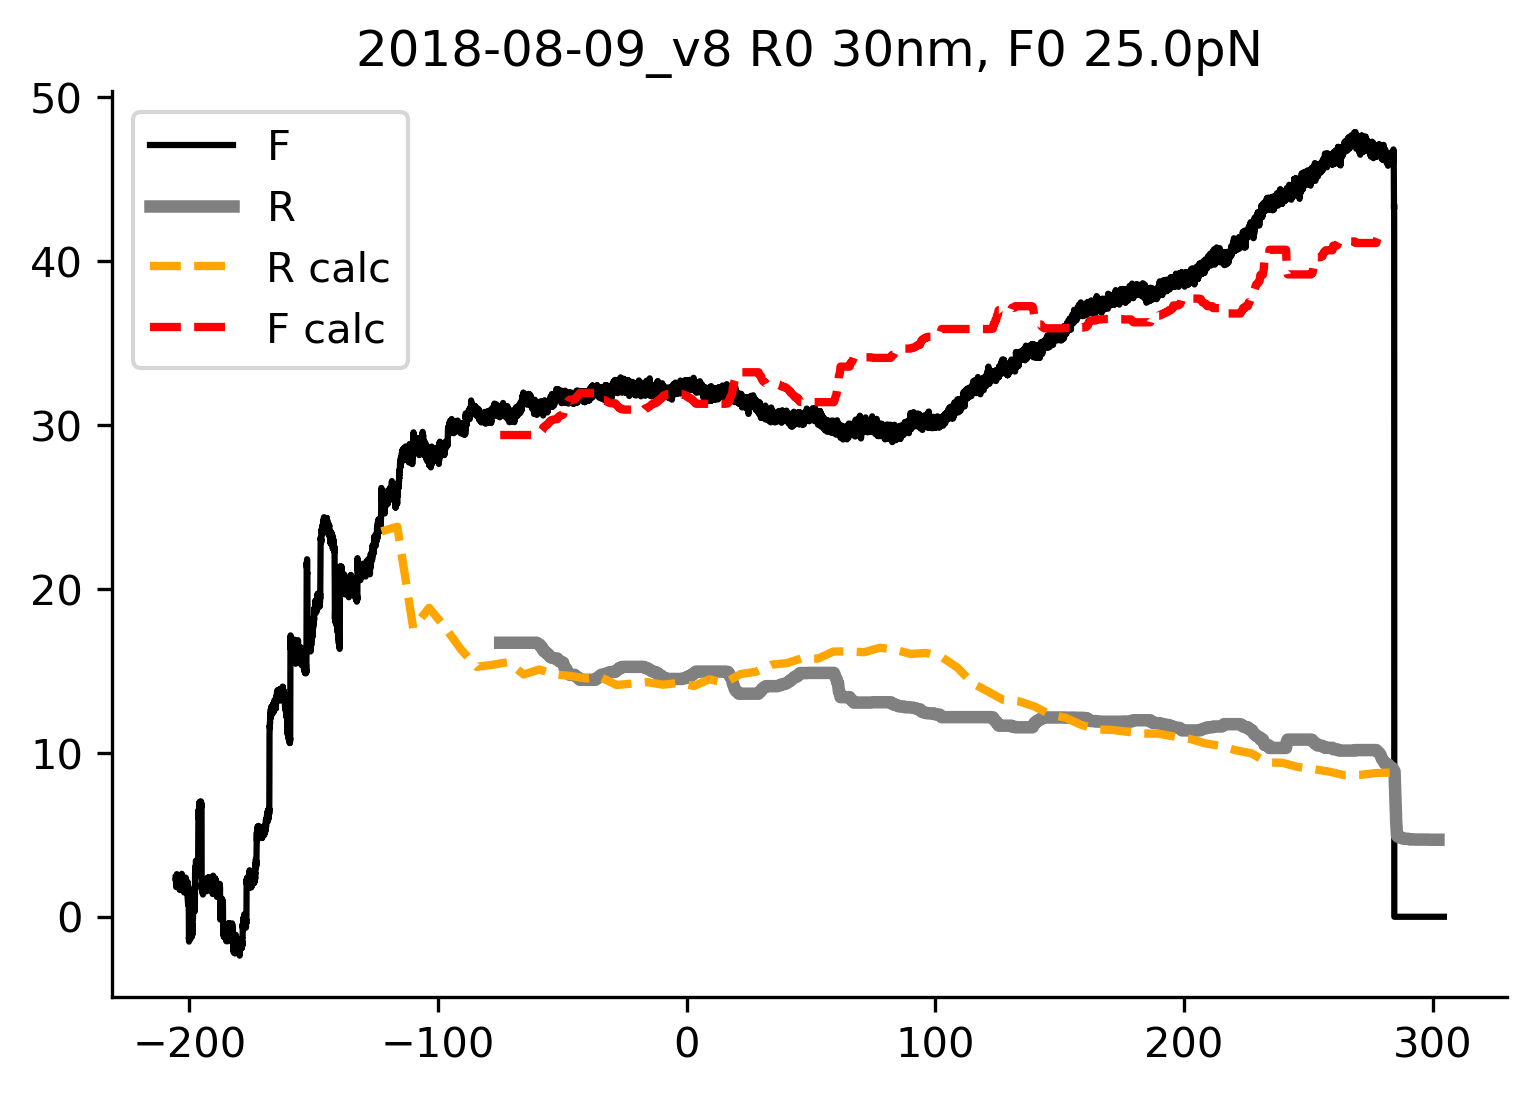

In [6]:
R0=30 #nm
F0=25. #pN, if this value is larger than the given force, the result are NANs, i.e. if F<F0
cutoffScissionTail = 70

plt.figure(dpi=300)
titleString = vesicleName+" R0 {}nm, F0 {}pN".format(R0,F0)
plt.gca().set_title(titleString)

plt.plot(force['time'].values,force['force'].values,c="k", label="F")
plt.plot(radius['time'].values,radius['radius'].values,c="grey", lw=3,label="R")

time = np.copy(force['time'].values)
Rcalc= calcRadius_gerhard(np.copy(force['force'].values),F0,R0)
#print(force['time'])

# take every 1000s element from the lists
plt.plot(time[0::1000],Rcalc[0::1000],c='orange',linestyle='--',lw=2, label="R calc")

Fcalc = calcForce_gerhard(radius['radius'],F0,R0)

plt.plot(radius['time'][0:-cutoffScissionTail],Fcalc[0:-cutoffScissionTail],c='r',linestyle='--',lw=2,label="F calc")



print(force['time'].values)
print(force['time'].values)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()
plt.show()

In [13]:
#2018-08-02 yes, wrong:
#def calcForce_amir_phone_probably_wrong(radius,kappa):
#    F = 2*math.pi*np.sqrt(kappa/radius)
#    return(F)

def calcForce_amir_(radius,kappa):
    F = (2*math.pi*kappa)/radius
    return(F)


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


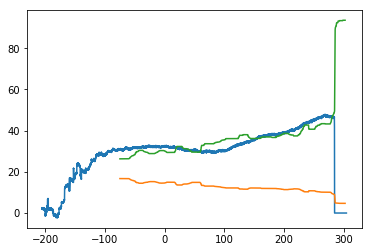

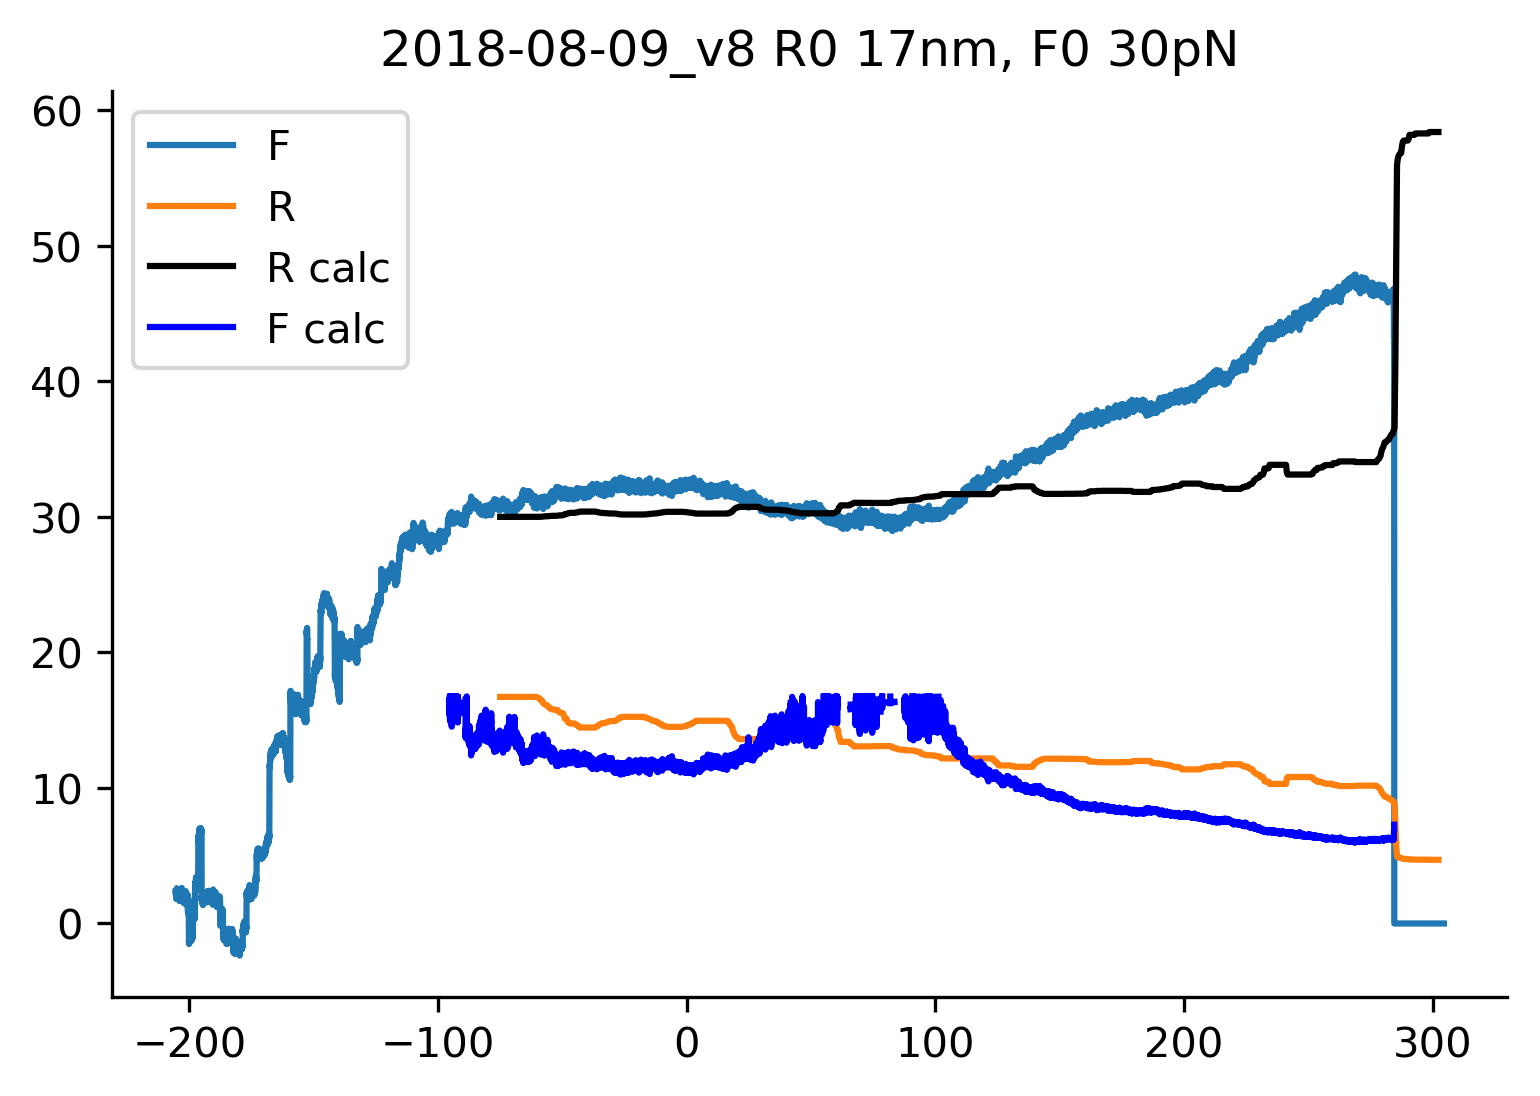

In [61]:
plt.plot(force['time'].values,force['force'].values)
plt.plot(radius['time'].values,radius['radius'].values)
kappa = 70
plt.plot(radius['time'].values,calcForce_amir_(radius['radius'].values,kappa))




plt.figure(dpi=300)
titleString = vesicleName+" R0 {}nm, F0 {}pN".format(R0,F0)
plt.gca().set_title(titleString)
plt.plot(force['time'].values,force['force'].values, label="F")
plt.plot(radius['time'].values,radius['radius'].values, label="R")

plt.plot(radius['time'].values,calcForce_gerhard(radius['radius'].values,F0,R0),c='k',label="R calc")
plt.plot(force['time'].values,calcRadius_gerhard(force['force'].values,F0,R0),c='b', label="F calc")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()
plt.show()